We want to sample from the first half year to compare against every subsequent month for significant changes.

In [1]:
%run ../src/parse_mails3.py
import matplotlib.pyplot as plt

df = parse_maildir3("../data/maildir")
df

,from,to,subject,date,week,year,month,seconds_since_midnight,hour,minute,second
../data/maildir/taylor-m/sent/77.,mark.taylor@enron.com,"jennifer.fraser@enron.com, jeffrey.hodge@enron...",Ormet,1999-01-04 10:21:00+00:00,1,1999,1,37260,10,21,0
../data/maildir/taylor-m/sent/78.,mark.taylor@enron.com,tana.jones@enron.com,Ormet,1999-01-04 12:11:00+00:00,1,1999,1,43860,12,11,0
../data/maildir/taylor-m/sent/79.,mark.taylor@enron.com,scott.sefton@enron.com,Re: London Trading Meetings,1999-01-05 12:04:00+00:00,1,1999,1,43440,12,4,0
../data/maildir/taylor-m/sent/80.,mark.taylor@enron.com,jenny.helton@enron.com,Re: 1998 ISDA Commodity Derivatives Definitions,1999-01-05 14:54:00+00:00,1,1999,1,53640,14,54,0
../data/maildir/taylor-m/sent/81.,mark.taylor@enron.com,scott.sefton@enron.com,Re: energy exchange in Germany,1999-01-06 09:35:00+00:00,1,1999,1,34500,9,35,0
...,...,...,...,...,...,...,...,...,...,...,...
../data/maildir/fischer-m/_sent_mail/5.,mark.fisher@enron.com,julie.johnson@enron.com,Work Request,2002-07-11 14:24:00+00:00,28,2002,7,51840,14,24,0
../data/maildir/fischer-m/_sent_mail/4.,mark.fisher@enron.com,tim.derrick@enron.com,Fluvanna and Trew Ranch reports,2002-07-11 15:12:00+00:00,28,2002,7,54720,15,12,0
../data/maildir/fischer-m/_sent_mail/3.,mark.fisher@enron.com,jeff.duff@enron.com,Desert Sky Curtailment,2002-07-11 16:22:00+00:00,28,2002,7,58920,16,22,0
../data/maildir/fischer-m/_sent_mail/2.,mark.fisher@enron.com,tom.nemila@enron.com,WR627 Fault Paretos (May 2002),2002-07-12 08:21:00+00:00,28,2002,7,30060,8,21,0


In [11]:
def get_data_for_month(year, month):
    min_no_of_mails = 10 # What is reasonable here? Strange effects when == 1
    
    df_month = df[(df["year"] == year) & (df["month"] == month)]
    grouped_times = df_month.groupby("from")["seconds_since_midnight"].apply(list).reset_index()
    grouped_times["no_mails"] = grouped_times["seconds_since_midnight"].apply(lambda x: len(x))
    grouped_times = grouped_times[grouped_times["no_mails"] > min_no_of_mails]
    grouped_times["25_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .25))
    grouped_times["75_quantile"] = grouped_times["seconds_since_midnight"].apply(lambda x: np.quantile(np.array(x), .75))
    if year == 2000 and month == 1:
        print(grouped_times.head())
    grouped_times["delta"] = grouped_times["75_quantile"] - grouped_times["25_quantile"]
    quantiles = grouped_times[["25_quantile", "75_quantile", "delta"]]
    return (quantiles, (quantiles["25_quantile"].mean(), quantiles["75_quantile"].mean()))

months = [(2000, 1), (2000, 2), (2000, 3), (2000,  4), (2000,  5), (2000,  6), 
          (2000, 7), (2000, 8), (2000, 9), (2000, 10), (2000, 11), (2000, 12),
          (2001, 1), (2001, 2), (2001, 3), (2001,  4), (2001,  5), (2001,  6), 
          (2001, 7), (2001, 8), (2001, 9), (2001, 10), (2001, 11), (2001, 12),
          (2002, 1), (2002, 2)]
avg_work_times = []

quantiles_months = []

for i in range(len(months)):
    quantiles, avg = get_data_for_month(*months[i])
    quantiles_months.append(quantiles)
    avg_work_times.append(avg)
    
quantiles_months[0]

                        from  \
2  benjamin.rogers@enron.com   
4    chris.dorland@enron.com   
5    chris.germany@enron.com   
7     daren.farmer@enron.com   
8      drew.fossum@enron.com   

                              seconds_since_midnight  no_mails  25_quantile  \
2  [59040, 33180, 36780, 27180, 60780, 59160, 361...        32      36615.0   
4  [34320, 48300, 48480, 54960, 58680, 59040, 522...        13      48420.0   
5  [50280, 52320, 70380, 36480, 49980, 59820, 556...       133      42420.0   
7  [58500, 26220, 26580, 41160, 51060, 53160, 559...        60      38205.0   
8  [37080, 42780, 43680, 43860, 44940, 62580, 306...        68      36270.0   

   75_quantile  
2      56175.0  
4      58680.0  
5      70380.0  
7      58455.0  
8      58080.0  


,25_quantile,75_quantile,delta
2,36615.0,56175.0,19560.0
4,48420.0,58680.0,10260.0
5,42420.0,70380.0,27960.0
7,38205.0,58455.0,20250.0
8,36270.0,58080.0,21810.0
9,35205.0,54525.0,19320.0
10,37425.0,57720.0,20295.0
13,38475.0,57675.0,19200.0
18,38790.0,52245.0,13455.0
21,51300.0,61500.0,10200.0


In [13]:
first_half = quantiles_months[0]
for i in range(1, 6):
    first_half = first_half.append(quantiles_months[i])
first_half_avg = first_half["delta"].mean()

In [16]:
0 + True + True + False

2

In [19]:
def calc_p_value(dist, mean, size, n=1000):
    sigma = 0
    mean_bp = dist.mean()
    for i in range(n):
        sigma = sigma + is_random_sample_more_extreme(dist, mean_bp, mean, size)
    return sigma / n

def is_random_sample_more_extreme(dist, mean_bp, mean, size):
    mean_sample = dist.sample(n=size, replace=True).mean()
    if mean > mean_bp:
        return mean_sample >= mean
    else:
        return mean_sample <= mean 

p_values = []
means = []
for i in range(6, len(months)):
    mean = quantiles_months[i]["delta"].mean()
    means.append(mean)
    size = len(quantiles_months[i])
    p_values.append(calc_p_value(quantiles_months[i]["delta"], mean, size, n=10000))
    
p_values

[0.5056,
 0.503,
 0.502,
 0.4985,
 0.5124,
 0.4984,
 0.5165,
 0.5092,
 0.5186,
 0.5111,
 0.5169,
 0.5238,
 0.5304,
 0.5217,
 0.5029,
 0.5249,
 0.5205,
 0.5204,
 0.5294,
 0.5247]

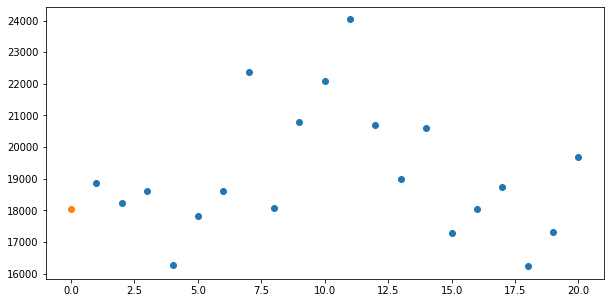

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(np.arange(1, len(means) + 1), means)
ax.scatter([0], first_half_avg)
plt.show()

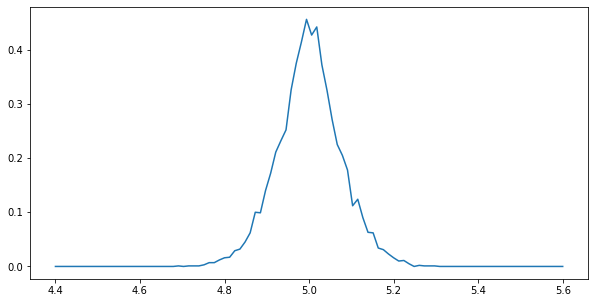

In [30]:
calc = lambda x: calc_p_value(pd.Series(np.linspace(4.5, 5.5, num=100)), x, 10)
calcall = np.vectorize(calc)
x = np.linspace(4.4, 5.6, num=100)
y = calcall(x)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y)
plt.show()

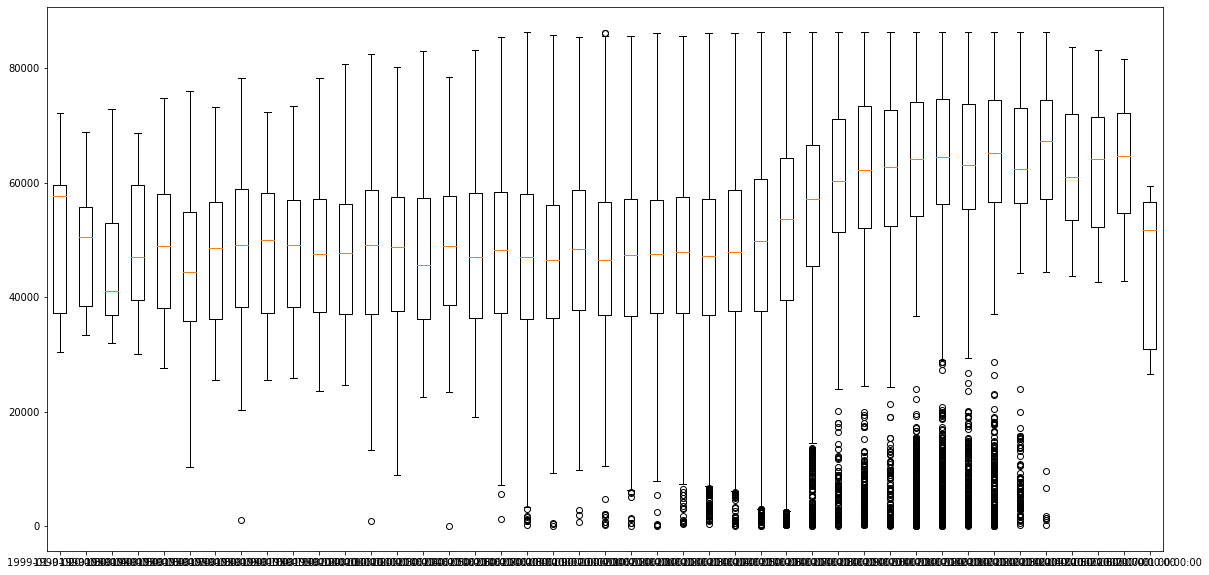

In [31]:
fig, ax = plt.subplots(figsize=(20, 10))
from datetime import datetime

df["month_date"] = df["date"].apply(lambda x: datetime(x.year, x.month, 1))
grouped_months = df.groupby("month_date")["seconds_since_midnight"].apply(list).reset_index()
times = grouped_months["seconds_since_midnight"].to_numpy()

ax.boxplot(times, labels=grouped_months["month_date"])
plt.show()

In [33]:
grouped_months["month_date"].to_numpy()[-1]

numpy.datetime64('2002-07-01T00:00:00.000000000')